# Wine Quality Dataset

### Origem do Dataset

- [*Kaggle - Wine Quality*](https://www.kaggle.com/datasets/rajyellow46/wine-quality/data)
- [*UC Irvine*](https://archive.ics.uci.edu/dataset/186/wine+quality)

#### Dataset Preparado

Após a última etapa, foram geradas versões preparadas do dataset supracitado, visando otimizar o treinamento de potenciais modelos. Os datasets preparados podem ser encontrados em [Repositório do *GitHub*](https://github.com/guilherme-puida/ia/tree/main/datasets/wine_quality/prepared).

### Atribuições

O dataset utilizado foi disponibilizado em página da [*UC Irvine*](https://archive.ics.uci.edu/dataset/186/wine+quality) sob a licença *CC BY 4.0*. As atribuições de autores se encontram no mesmo *site* supracitado. O dataset possui *paper* introdutório sob autoria de [CORTEZ et al (2009)](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub).

CORTEZ, Paulo; ANTÓNIO CERDEIRA; ALMEIDA, Fernando; et al. Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, v. 47, n. 4, p. 547–553, 2009. Disponível em: <https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub>.

### Objetivo

Esse notebook visa selecionar os modelos de maior potencial para o presente dataset.

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../../datasets/wine_quality_data/prepared/wine_treated.csv')

In [3]:
display(df)

,wine,winery,category,designation,varietal,appellation,alcohol,price,rating,reviewer,review,country
0,Antucura 2010 Pinot Noir (Vista Flores),Antucura,Red,NaN,Pinot Noir,"Vista Flores, Mendoza Province, Argentina",15.0,17,85,Michael Schachner,"Rubbery, bold and earthy on the nose, then ful...",Argentina
1,Tenuta di Ghizzano 2006 Il Ghizzano Red (Toscana),Tenuta di Ghizzano,Red,Il Ghizzano,"Red Blends, Red Blends","Toscana, Tuscany, Italy",13.5,18,86,NaN,The nose is rather neutral save for distant ar...,Italy
2,Tenuta San Francesco 2007 Tramonti White (Camp...,Tenuta San Francesco,White,Tramonti,White Blend,"Campania, Southern Italy, Italy",13.5,21,85,NaN,"This intriguing blend of Falanghina, Biancolel...",Italy
3,Las Positas 2011 Estate Barbera (Livermore Val...,Las Positas,Red,Estate,Barbera,"Livermore Valley, Central Coast, California, US",15.1,40,89,Virginie Boone,"This is a hefty Barbera, replete with dark, br...",US
4,Krupp Brothers 2007 The Doctor Red (Napa Valley),Krupp Brothers,Red,The Doctor,"Red Blends, Red Blends","Napa Valley, Napa, California, US",15.1,60,92,NaN,"An ambitious blend of Merlot, Tempranillo, Mal...",US
...,...,...,...,...,...,...,...,...,...,...,...,...
263693,Maddalena 2017 Rosé (Paso Robles),Maddalena,Rose,NaN,Rosé,"Paso Robles, Central Coast, California, US",12.5,18,87,Matt Kettmann,"Candied raspberry, cranberry, orange juice and...",US
263694,Toscolo 2015 Vernaccia di San Gimignano,Toscolo,White,NaN,"Vernaccia, Italian White","Vernaccia di San Gimignano, Tuscany, Italy",12.5,11,87,Kerin O’Keefe,"Aromas of white spring flower, yellow pear and...",Italy
263695,Domaine G. Metz 2017 Pinot Blanc (Alsace),Domaine G. Metz,White,NaN,Pinot Blanc,"Alsace, Alsace, France",13.0,20,90,Anne Krebiehl MW,"A tinge of earth clings to the ripe, almost ju...",France
263696,Huston 2019 Chicken Dinner Red (Idaho),Huston,Red,Chicken Dinner,"Red Blends, Red Blends","Idaho, Idaho, US",14.3,18,87,Sean P. Sullivan,"Fruit-forward aromas of plum, huckleberry and ...",US


In [4]:
df = df.drop_duplicates()

In [5]:
df = df.drop(['review', 'reviewer', 'appellation', 'wine', 'winery'], axis = 1)

In [6]:
df['price'] = df['price'].replace(r'^\.$|^\d*\.$', 'NaN', regex=True)

In [7]:
df['price'] = df['price'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263691 entries, 0 to 263697
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   category     263691 non-null  object 
 1   designation  188917 non-null  object 
 2   varietal     246708 non-null  object 
 3   alcohol      263691 non-null  float64
 4   price        257557 non-null  float64
 5   rating       263691 non-null  int64  
 6   country      263691 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 16.1+ MB


In [9]:
display(df)

,category,designation,varietal,alcohol,price,rating,country
0,Red,NaN,Pinot Noir,15.0,17.0,85,Argentina
1,Red,Il Ghizzano,"Red Blends, Red Blends",13.5,18.0,86,Italy
2,White,Tramonti,White Blend,13.5,21.0,85,Italy
3,Red,Estate,Barbera,15.1,40.0,89,US
4,Red,The Doctor,"Red Blends, Red Blends",15.1,60.0,92,US
...,...,...,...,...,...,...,...
263693,Rose,NaN,Rosé,12.5,18.0,87,US
263694,White,NaN,"Vernaccia, Italian White",12.5,11.0,87,Italy
263695,White,NaN,Pinot Blanc,13.0,20.0,90,France
263696,Red,Chicken Dinner,"Red Blends, Red Blends",14.3,18.0,87,US


In [10]:
lb = LabelEncoder()


In [11]:
categorical_columns = ['category', 'designation', 'varietal', 'country']
for column in categorical_columns:
    df[column] = lb.fit_transform(df[column])

In [12]:
display(df)

,category,designation,varietal,alcohol,price,rating,country
0,3,66881,521,15.0,17.0,85,0
1,3,28348,547,13.5,18.0,86,9
2,6,60784,762,13.5,21.0,85,9
3,3,20814,74,15.1,40.0,89,15
4,3,58849,547,15.1,60.0,92,15
...,...,...,...,...,...,...,...
263693,4,66881,571,12.5,18.0,87,15
263694,6,66881,734,12.5,11.0,87,9
263695,6,66881,508,13.0,20.0,90,4
263696,3,11079,547,14.3,18.0,87,15


In [13]:
# reposicionando a coluna "type"

cols = ["category","designation","varietal", "alcohol",	"price",	"country", "rating"]
df = df.reindex(columns=cols)

display(df)

,category,designation,varietal,alcohol,price,country,rating
0,3,66881,521,15.0,17.0,0,85
1,3,28348,547,13.5,18.0,9,86
2,6,60784,762,13.5,21.0,9,85
3,3,20814,74,15.1,40.0,15,89
4,3,58849,547,15.1,60.0,15,92
...,...,...,...,...,...,...,...
263693,4,66881,571,12.5,18.0,15,87
263694,6,66881,734,12.5,11.0,9,87
263695,6,66881,508,13.0,20.0,4,90
263696,3,11079,547,14.3,18.0,15,87


In [14]:
df = df.dropna()

In [15]:
y = df['rating'].values
y

array([85, 86, 85, ..., 90, 87, 86])

In [16]:
X = df.iloc[:, :-1].values
X

array([[3.0000e+00, 6.6881e+04, 5.2100e+02, 1.5000e+01, 1.7000e+01,
        0.0000e+00],
       [3.0000e+00, 2.8348e+04, 5.4700e+02, 1.3500e+01, 1.8000e+01,
        9.0000e+00],
       [6.0000e+00, 6.0784e+04, 7.6200e+02, 1.3500e+01, 2.1000e+01,
        9.0000e+00],
       ...,
       [6.0000e+00, 6.6881e+04, 5.0800e+02, 1.3000e+01, 2.0000e+01,
        4.0000e+00],
       [3.0000e+00, 1.1079e+04, 5.4700e+02, 1.4300e+01, 1.8000e+01,
        1.5000e+01],
       [3.0000e+00, 6.6881e+04, 1.8700e+02, 1.3500e+01, 2.8000e+01,
        9.0000e+00]])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# treinando o modelo

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# aplicando o modelo nas variáveis de teste

y_pred_linear = model.predict(X_test)

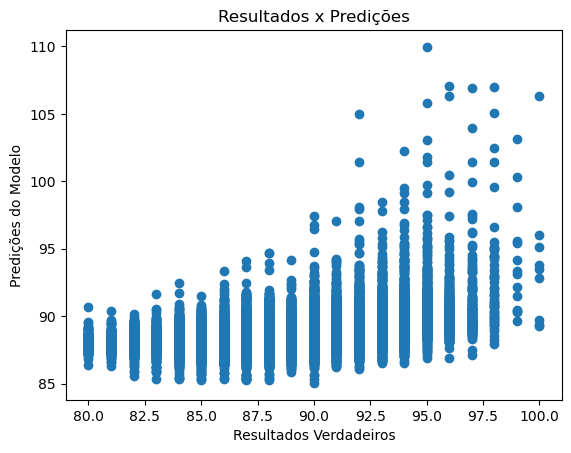

In [20]:
# Plot dos resultados x Predições do Modelo

plt.scatter(y_test, y_pred_linear)
plt.xlabel("Resultados Verdadeiros")
plt.ylabel("Predições do Modelo")
plt.title("Resultados x Predições")
plt.show()

In [21]:
display(y_test)

array([90, 93, 88, ..., 93, 89, 89])

In [22]:
display(y_pred_linear)

array([88.32693881, 88.06487261, 87.95575385, ..., 89.78052688,
       89.2279233 , 88.97619604])

In [23]:
# Desempenho do modelo

print(f"Erro Quadrático Médio: {mean_squared_error(y_pred_linear, y_test)}")
print(f"Erro Absoluto Médio: {mean_absolute_error(y_pred_linear, y_test)}")

Erro Quadrático Médio: 7.96779414885468
Erro Absoluto Médio: 2.2803878284641934


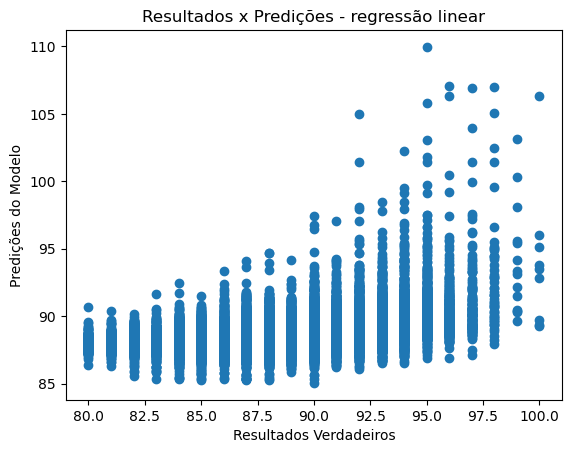

In [31]:
# Plot dos resultados x Predições do Modelo

plt.scatter(y_test, y_pred_linear)
plt.xlabel("Resultados Verdadeiros")
plt.ylabel("Predições do Modelo")
plt.title("Resultados x Predições - regressão linear")
plt.show()

In [25]:
knn = KNeighborsRegressor(n_neighbors=7)  # You can adjust the number of neighbors

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_knn)
print(f"Erro Quadrático Médio: {mean_squared_error(y_pred_knn, y_test)}")
print(f"Erro Absoluto Médio: {mean_absolute_error(y_pred_knn, y_test)}")

Erro Quadrático Médio: 6.297717829172359
Erro Absoluto Médio: 1.9728939720009764


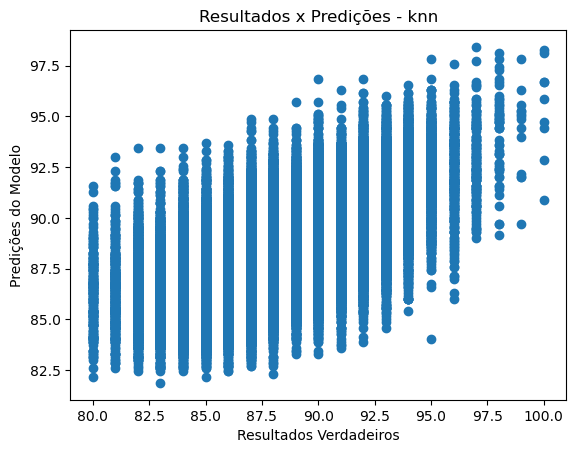

In [33]:
# Plot dos resultados x Predições do Modelo

plt.scatter(y_test, y_pred_knn)
plt.xlabel("Resultados Verdadeiros")
plt.ylabel("Predições do Modelo")
plt.title("Resultados x Predições - knn")
plt.show()

In [27]:
# Initialize Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_regressor.predict(X_test)

print(f"Erro Quadrático Médio: {mean_squared_error(y_pred_rf, y_test)}")
print(f"Erro Absoluto Médio: {mean_absolute_error(y_pred_rf, y_test)}")

Erro Quadrático Médio: 5.698379645292176
Erro Absoluto Médio: 1.863801561657952


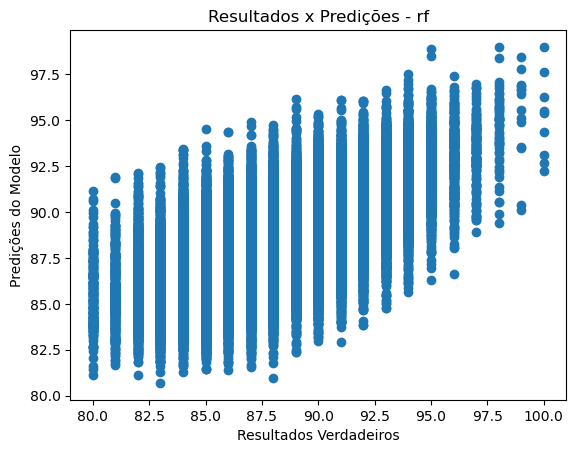

In [32]:
# Plot dos resultados x Predições do Modelo

plt.scatter(y_test, y_pred_rf)
plt.xlabel("Resultados Verdadeiros")
plt.ylabel("Predições do Modelo")
plt.title("Resultados x Predições - rf")
plt.show()

In [29]:
# Convert data into DMatrix format required by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # Objective function for regression task
    'eval_metric': 'rmse',  # Evaluation metric
    'max_depth': 3,  # Maximum depth of each tree
    'eta': 0.1,  # Learning rate
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bytree': 0.8  # Subsample ratio of columns when constructing each tree
}

# Train the model
num_rounds = 100  # Number of boosting rounds
xgboost_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test data
y_pred_xgb = xgboost_model.predict(dtest)

print(f"Erro Quadrático Médio: {mean_squared_error(y_pred_xgb, y_test)}")
print(f"Erro Absoluto Médio: {mean_absolute_error(y_pred_xgb, y_test)}")

Erro Quadrático Médio: 5.5749993869345715
Erro Absoluto Médio: 1.8721585155995963


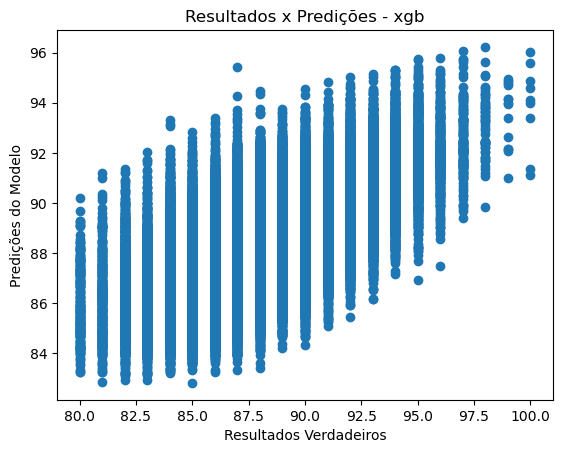

In [34]:
# Plot dos resultados x Predições do Modelo

plt.scatter(y_test, y_pred_xgb)
plt.xlabel("Resultados Verdadeiros")
plt.ylabel("Predições do Modelo")
plt.title("Resultados x Predições - xgb")
plt.show()